<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

<h1 align=center><font size = 5> K-Means Clustering in R</font></h1>

## Introduction

There are many **clustering** algorithms out there. In this exercise, we will be presenting the **K-means clustering** algorithm, which is considered to be one of the simplest clustering algorithms. Despite its simplicity, the K-means is vastly used for clustering in many data science applications, and is especially useful if you need to quickly discover insights from **unlabeled data**.

Some real-world applications of k-means:
- Customer segmentation
- <p><a href = "http://www.r-bloggers.com/clustering-search-keywords-using-k-means-clustering/">Understand what the visitors of a website are trying to accomplish</a></p>
- Pattern recognition
- Machine learning
- Data compression
    

-----------------

## Table of contents 

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 3><strong>K-Means Clustering:</strong></font><br>
- <p><a href="#ref1">The problem we want to solve</a></p>
- <p><a href="#ref2">Framing the real problem to the application of the k-means algorithm</a></p>
- <p><a href="#ref3">The dataset</a></p>
- <p><a href="#ref4">A quick implementation</a></p>
<p></p>
</div>
<br>


----------------

<a id="ref1"></a>
# The problem to solve

Imagine you have some money to invest and decide that you want to start a small fashion company with a friend (After all, if you sell clothes, you can get them for lower prices for yourself, your family and your friends). Your company's name will be <font color = red size = 4> *K<font size  = 1>&</font>M* </font> and the first product of your company will be white t-shirts (because everyone has them, and if everyone has them, they must buy it from somewhere). While talking to suppliers, sketching the t-shirt models, and discussing about your launch campaign, **two important questions** arose: 

- *How many t-shirts sizes should we have*?
- *What dimensions should each t-shirt size have*?

The first idea that comes to your mind is to check the size of one of your competitors' t-shirts. But then you recall that time when you bought two Small size t-shirts from two different brands to later realize that only one of them would fit. (The other would too, if it was yourself a couple of years ago).

Your friend suggests that he would measure his shortest and tallest friends, and use those measurements to design the Small and Large sizes respectively. The Medium size would then have the average dimensions between the Large and Small sizes.

After a lenghty discussion between you and your friend, without drawing any conclusion, you remember one thing that your university professor used to say in the class: 

<h1 align=center>'***Against facts there are no arguments.***'</h1>

So you both agree to take a data-backed approach, and for this you can use the ** K-means algorithm**!

------------

<a id="ref2"></a>
<a id="ref100"></a>
# Framing the real problem to the application of the k-means algorithm
Instead of relying on the information from two people or copying the failure of others, why not explore the root-cause of this problem? You will look into the <font color = green>data of your potential customers </font> and run <font color = green>some experiments</font> to decide <font color = green>how many t-shirt sizes</font> you should have, and what should <font color = green>the dimensions of each t-shirt size</font> be.

You might be wondering why those words in green appeared above. Each one of the highlighted items corresponds to an important component of the *K-means* implementation:

- The <font color = green>data of your potential customers </font> corresponds to the <a href="#ref20">**dataset**</a>;
- <font color = green>"Some experiments"</font> refers to the multiple **number of iterations** of the algorithm;
- <font color = green>How many t-shirt sizes</font> is defined by the **number of clusters**;
- <font color = green>The dimensions of each t-shirt size</font> will be defined by the **cluster centroids**.

If you don't understand some of the terms related to k-means, don't worry. We will go back to them later in this notebook.

-------------------

<a id="ref3"></a>
<a id="ref20"></a>

# The dataset
You decided that <font color = red size = 4> *K<font size  = 1>&</font>M* </font> will start its operations in Hong Kong. For this task, an open (publicly available) dataset will be used. <a href = "http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html"> ***HKkids***</a> has information about the weight and height of 25000 kids from Hong Kong, collected in 1993 for a growth study. We will be using only these two measures in order to simplify the problem. (But we could have used a dataset with all the chest, arms, neck, waist, etc. measurements if we wanted!)  

Now let's start playing with the data. We will work according to the following workflow:
1. Load
- Overview
- Clean
- Visualize

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Expert tip:</strong></font>
<br>
<br>
We will go through these steps very quickly. If you want a better explanation of the process of managing datasets, you can check the Introduction to R course.<p></p>

</div>

### 1. Loading the data

In [1]:
# Downloading the file to the Data Scientist Workbench
#download.file("https://ibm.box.com/shared/static/vw5gm9h25gnd7qdcmxm9exawphh0kgxy.csv", "/resources/data/HKkids.csv")

In [3]:
# Reading the csv file
HKkids <- read.csv("HKkids.csv", sep =';')

### 2. Overview of the data

In [4]:
# What does the data look like?
head(HKkids)

Index,Height.Inches.,Weight.Pounds.
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
6,68.69784,123.3024


In [5]:
# Changing column names to shorter names
colnames(HKkids) <- c("Index", "Height", "Weight")

In [6]:
# Let's check general information  about the data!
str(HKkids)

'data.frame':	25000 obs. of  3 variables:
 $ Index : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Height: num  65.8 71.5 69.4 68.2 67.8 ...
 $ Weight: num  113 136 153 142 144 ...


### 3. Cleaning the data

In [7]:
# Removing the unnecessary index column
HKkids$Index <- NULL

### 4. Visualizing the data

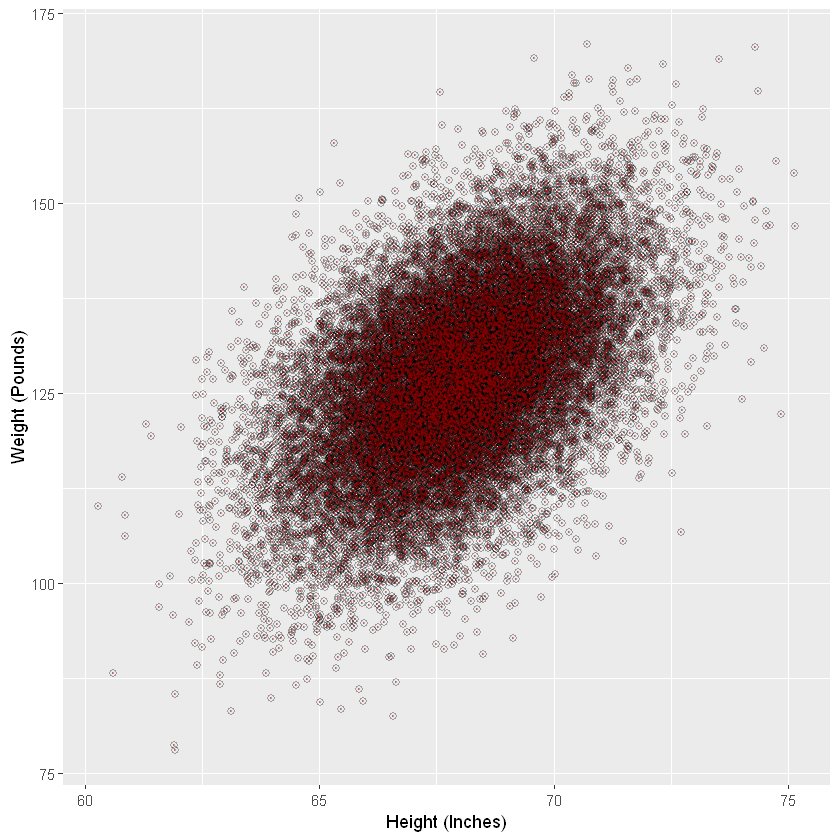

In [8]:
# It is always good practice to visualize your data!

# install the ggplot2 package
if("ggplot2" %in% rownames(installed.packages()) == FALSE) {install.packages("ggplot2")}
library(ggplot2)

ggplot(HKkids, aes(x = HKkids$Height, y = HKkids$Weight)) +
geom_point(shape=1, size = 2, color = "black", alpha = 1/3) +
geom_point(size = 0.1, color = "red4", alpha = 1/3) +
labs (x = "Height (Inches)", y = "Weight (Pounds)")

-----------------------

<a id="ref4"></a>
# A quick implementation

In the beginning of this notebook, it was mentioned that **K-means** is a simple algorithm for clustering. Because of that, despite its <a href = "http://www.kdnuggets.com/2015/01/data-science-102-kmeans-clustering-not-free-lunch.html">limitations</a>, it's faster to implement than other more complex methods.

In this section, we will show a quick implementation of the K-means algorithm. The implementation will be divided into three main sections:

1. Normalization
- Applying K-means
- Insights
    - Finding the size of each T-shirt
    - How well is each T-shirt fitting?

### 1. Normalizing

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally by converting them into comparable units. Here, we normalize taking the z-scores of the two variables.

In [9]:
# Calculate and store the mean and standard deviation for each dataset, before we normalize
original_height_mean = mean(HKkids$Height)
original_height_sd = sd(HKkids$Height)
original_weight_mean = mean(HKkids$Weight)
original_weight_sd = sd(HKkids$Weight)

In [10]:
# Z-scoring
HKkids$Height <- (HKkids$Height - original_height_mean) / original_height_sd
HKkids$Weight <- (HKkids$Weight - original_weight_mean) / original_weight_sd

### 2. Applying K-means clustering
Remember when we explained what <a href="#ref100">the number of t-shirts sizes, the dimensions of each t-shirt and number of experiments</a> represent in our implementation of K-means? Back then, we talked about the **number of iterations, number of clusters and cluster centroids**. Let's first review what each of these parameters mean in our problem, and then explain a little bit more about each.
- <font color = green>"Some experiments"</font> refers to the multiple **number of iterations** of the algorithm;
- <font color = green>How many t-shirt sizes</font> is defined by the **number of clusters**;
- <font color = green>Which dimensions should each t-shirt size</font> will be defined by the **cluster centroids**.



The K-means algorithm uses an **iterative** approach to find the best solution. In other words, multiple "experiments" are done, by first guessing random values for the **cluster centroids** which is called the cluster assignment step.

1. Choose k cluster centers 
    - option1: Select k objects randomly as centroids
    - option1: Initialize k centroids randomly
2. Calculate the distance of all objects from k centroids, using a distance measurment, e.g. Euclidean distance.
2. Assign each objects to the closest cluster center.
3. Recompute the position of  cluster centers using the current cluster memberships.
4. If a convergence criterion is not met, go to step 2. Typical convergence criteria are: no (or minimal) reassignment of patterns to new cluster centers, or minimal decrease in squared error.


In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each t-shirt size (Small, Medium and Large) would have certain dimensions, ask everyone in the population to try each one of the t-shirts and check how well fitted were the chosen dimensions. Depending on the feedback, we would then lower or increase the dimensions of each t-shirt. However, using the K-means clustering we can do all this process "virtually" (Which is cheaper, faster and easier). The **number of iterations** is basically how many times we want to "virtually produce" t-shirts and get feedback on how right the sizes are.

The **number of clusters** is the number of divisions we want to create in the dataset. This is a parameter that can be tuned or pre-determined by the problem we want to solve. Usually, there is a **trade-off that must be faced**. As the number of clusters increases, each cluster gets more homogeneous. But working with more clusters is often **more expensive**. 

Let's illustrate this trade-off with t-shirts: Why we don't see 20 different t-shirt sizes or even, one custom-made t-shirt for every person that comes to a clothing store? Well, actually... there are some brands that do that. But they are generally a lot more expensive. Also higher K value (number of clusters) will potentially lead to model overfitting problem.

Now that you know a lot about the basics of the k-means algorithm, let's move to the implementation. (Finally!)

In [11]:
# "HKkids" is our data
# "centers" is the number of clusters
# "iter.max" is the number of iterations
# Try experimenting with different numbers!
clusters_numbers = kmeans (HKkids, centers = 3, iter.max = 10)

In [12]:
# We are using a color_offset = 4 just for making things easier to see.
# Try experimenting with different numbers!
color_offset = 4

In [13]:
# We have to convert numbers to categorical data in order to color the chart
HKkids$Cluster <- as.factor(clusters_numbers$cluster + color_offset)

In [14]:
# Checking if the cluster assignments are there ! (Notice that the clusters are numbered with the color_offset!)
head(HKkids)

Height,Weight,Cluster
-1.1620278,-1.2080478,7
1.8520985,0.8067886,6
0.7391503,2.2251699,6
0.1175206,1.3083023,6
-0.1079591,1.4765312,6
0.3705812,-0.3239048,5


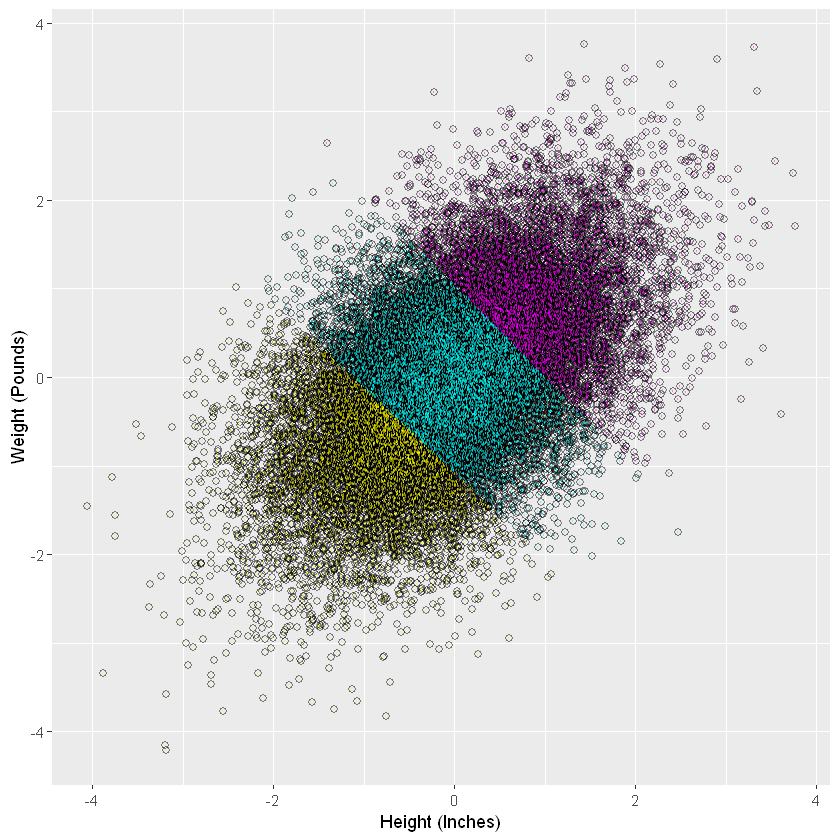

In [15]:
ggplot() +
geom_point(data = HKkids, aes(x = HKkids$Height, y = HKkids$Weight), shape=1, size = 2, color = "black", alpha = 1/2) +
geom_point(data = HKkids, aes(x = HKkids$Height, y = HKkids$Weight), shape=1, size = 0.1, colour = HKkids$Cluster, alpha = 1/2) +
labs (x = "Height (Inches)", y = "Weight (Pounds)")

That's a cool visualization, right? (We could even use it as the first logo for our t-shirts.)

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Expert tip:</strong></font>
<br>
<br>
Why don't you try changing the "centers" or the "color_offset" values in the beginning of this section? <p></p>

</div>

### 3. Insights

#### The size of each t-shirt
In order to get the size of each t-shirt, we just have to look at the location of each **cluster centroid**.

In [16]:
# Extracting the cluster centroids
Cluster_centroids <- as.data.frame(clusters_numbers$centers)

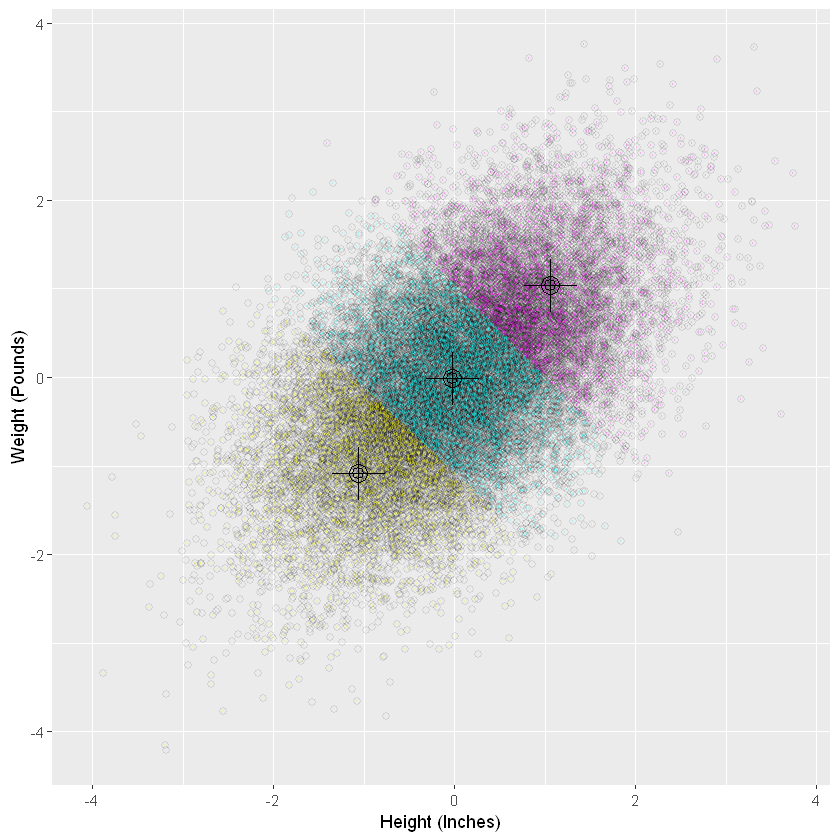

In [17]:
# Plotting the centroids found
ggplot() +
geom_point(data = HKkids, aes(x = HKkids$Height, y = HKkids$Weight), shape=1, size = 2, color = "black", alpha = 1/10) +
geom_point(data = HKkids, aes(x = HKkids$Height, y = HKkids$Weight), shape=1, size = 0.1, colour = HKkids$Cluster, alpha = 1/4) +
geom_point(data = Cluster_centroids, aes(x = Cluster_centroids$Height, y = Cluster_centroids$Weight), shape = 1, size = 3, color = "black") +
geom_point(data = Cluster_centroids, aes(x = Cluster_centroids$Height, y = Cluster_centroids$Weight), shape = 1, size = 5, color = "black") +
geom_point(data = Cluster_centroids, aes(x = Cluster_centroids$Height, y = Cluster_centroids$Weight), shape = 3, size = 10, color = "black") +
labs (x = "Height (Inches)", y = "Weight (Pounds)")

In [18]:
# Checking the location of each cluster centroid
Cluster_centroids

Height,Weight
-0.0283135,-0.006593033
1.0598163,1.038363332
-1.0650543,-1.080265951


In [19]:
# Undoing the normalization
tee_sizes <- Cluster_centroids
tee_sizes$Height <- (tee_sizes$Height * original_height_sd) + original_height_mean
tee_sizes$Weight <- (tee_sizes$Weight * original_weight_sd) + original_weight_mean

In [20]:
# Printing the size of each t-shirt
tee_sizes

Height,Weight
67.93927,127.0025
70.00854,139.1877
65.96772,114.4826


We found the t-shirt sizes !

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<font size = 3><strong>Comment:</strong></font>
<br>
<br>

The tee sizes are not sorted in ascending order. We can use the function *which* to find the true indices corresponding to small, medium and large sizes .<p></p>

</div>

Small size 

In [21]:
small <- which(tee_sizes$Height==min(tee_sizes$Height))
tee_sizes[small,]

,Height,Weight
3,65.96772,114.4826


Medium size

In [22]:
medium <- which(tee_sizes$Height==median(tee_sizes$Height))
tee_sizes[medium,]

Height,Weight
67.93927,127.0025


Large size

In [23]:
large <- which(tee_sizes$Height==max(tee_sizes$Height))
tee_sizes[large,]

,Height,Weight
2,70.00854,139.1877


#### How well each t-shirt is fitting ?

Since we were trying to find the best sizes for each t-shirt, it's good to check if our sizes are fitting most of the people in  their respective population segments. By checking the **standard deviation**, we can have a clue about how well we are doing that job. In other words, the standard deviation will tell whether if some of the customers will find very tight or very loose t-shirts, or not-so-tight and not-so-loose t-shirts. The lower, the better.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<font size = 3><strong>Comment:</strong></font>
<br>
<br>

Similar to the previous update, the previous version of this notebook has the small cluster number = 1 + color_offset, which is not always true since cluster numbers are randomly selected and either the large or medium cluster could have been assigned as cluster number [1+ color_offset].

The variables small, medium and large are used to replace the indices used in the previous version.<p></p>

</div>

In [24]:
# Creating subsets for each one of the segments of the population
small_HKkids <- HKkids[HKkids$Cluster == small + color_offset,]
medium_HKkids <- HKkids[HKkids$Cluster == medium + color_offset,]
large_HKkids <- HKkids[HKkids$Cluster == large + color_offset,]

In [25]:
# Storing all the standard deviations of each cluster to our tee_size matrix
tee_sizes$sd_Height[small] = sd(small_HKkids$Height)
tee_sizes$sd_Height[medium] = sd(medium_HKkids$Height)
tee_sizes$sd_Height[large] = sd(large_HKkids$Height)
tee_sizes$sd_Weight[small] = sd(small_HKkids$Weight)
tee_sizes$sd_Weight[medium] = sd(medium_HKkids$Weight)
tee_sizes$sd_Weight[large] = sd(large_HKkids$Weight)

In [26]:
tee_sizes

Height,Weight,sd_Height,sd_Weight
67.93927,127.0025,0.5802189,0.5767092
70.00854,139.1877,0.6493162,0.6650362
65.96772,114.4826,0.6669982,0.6680091


As we can see, there is only approximately 1% of standard deviation for each segment, which is a pretty good result!

With this insight, we finish this class! We hope that you can now apply the K-means algorithm to solve your **own problems.**

### Conclusion

1.  There are two main advantages in using K-Means: 
    - First, it’s easy to understand
    - And second, it’s very fast compared to many other clustering algorithms

2.  K-Means also has some disadvantages, as well.  
    - First, It has no specified initialization of cluster points and it has a high variation of clustering models based on initialization of cluster points
    - Second, getting accurate results depends on distance measuring metrics.
And finally, there is the possibility of a centroid not having data points in its group, therefore not being able to be updated.


<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Expert tip:</strong></font>
<br>
<br>
Now that you know how we applied the K-means to a specific problem, it's time to think about what kind of problem you can solve with this new tool. You can start by searching about it in the internet, and use this notebook as a quick way to apply K-means to these different problems.<p></p>

</div>

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler for Mac users](https://cocl.us/ML0151EN_SPSSMod_mac) and [SPSS Modeler for Windows users](https://cocl.us/ML0151EN_SPSSMod_win)

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0151EN_DSX)

### Thanks for completing this lesson!

Notebook created by: <a href = "https://ca.linkedin.com/in/erich-natsubori-sato">Erich Natsubori Sato</a> , <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2016 [Cognitive Class](https://cognitiveClass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).